In [1]:
import pandas as pd

df = pd.read_csv('/Users/mrojsutivat/Documents/COD Advanced Python/practice-deeplearning-master/Part 1: Predicting House Prices/housepricedata.csv')
print(df)

      LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        8450            7            5          856         2         1   
1        9600            6            8         1262         2         0   
2       11250            7            5          920         2         1   
3        9550            7            5          756         1         0   
4       14260            8            5         1145         2         1   
...       ...          ...          ...          ...       ...       ...   
1455     7917            6            5          953         2         1   
1456    13175            6            6         1542         2         0   
1457     9042            7            9         1152         2         0   
1458     9717            5            6         1078         1         0   
1459     9937            5            6         1256         1         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0         

In [2]:
dataset = df.values

In [3]:
print(dataset)

[[ 8450     7     5 ...     0   548     1]
 [ 9600     6     8 ...     1   460     1]
 [11250     7     5 ...     1   608     1]
 ...
 [ 9042     7     9 ...     2   252     1]
 [ 9717     5     6 ...     0   240     0]
 [ 9937     5     6 ...     0   276     0]]


In [4]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [5]:
from sklearn import preprocessing

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
print(X_scale)

[[0.0334198  0.66666667 0.5        ... 0.5        0.         0.3864598 ]
 [0.03879502 0.55555556 0.875      ... 0.33333333 0.33333333 0.32440056]
 [0.04650728 0.66666667 0.5        ... 0.33333333 0.33333333 0.42877292]
 ...
 [0.03618687 0.66666667 1.         ... 0.58333333 0.66666667 0.17771509]
 [0.03934189 0.44444444 0.625      ... 0.25       0.         0.16925247]
 [0.04037019 0.44444444 0.625      ... 0.33333333 0.         0.19464034]]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [10]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [11]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [13]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6792 - accuracy: 0.5959 - val_loss: 0.6820 - val_accuracy: 0.5982
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6898 - val_loss: 0.6757 - val_accuracy: 0.6438
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.7202 - val_loss: 0.6696 - val_accuracy: 0.7215
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.7720 - val_loss: 0.6651 - val_accuracy: 0.7443
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.7867 - val_loss: 0.6603 - val_accuracy: 0.7717
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.7867 - val_loss: 0.6560 - val_accuracy: 0.7854
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.7945 - val_loss: 0.6514 - val_accuracy: 0.7854
Epoch 8/100
3

In [15]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 23ms/step - loss: 0.2400 - accuracy: 0.9132


0.913241982460022

In [16]:
import matplotlib.pyplot as plt

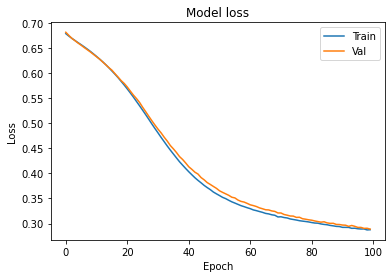

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

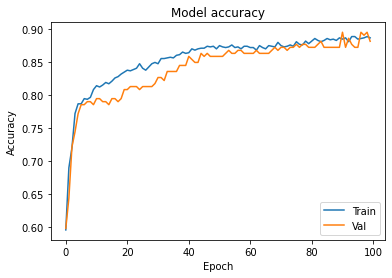

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 33ms/step - loss: 0.5015 - accuracy: 0.7671 - val_loss: 0.3970 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3561 - accuracy: 0.8571 - val_loss: 0.3147 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3193 - accuracy: 0.8699 - val_loss: 0.3423 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3025 - accuracy: 0.8826 - val_loss: 0.3089 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2761 - accuracy: 0.8885 - val_loss: 0.2906 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 2s 50ms/step - loss: 0.2870 - accuracy: 0.8728 - val_loss: 0.3051 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.2617 - accuracy: 0.8963 - val_loss: 0.2643 - val_accuracy: 0.8858
Epoch 

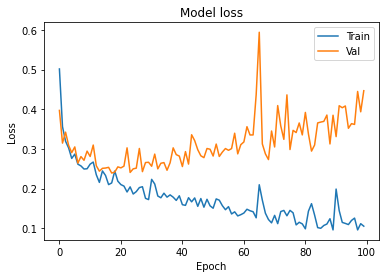

In [22]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

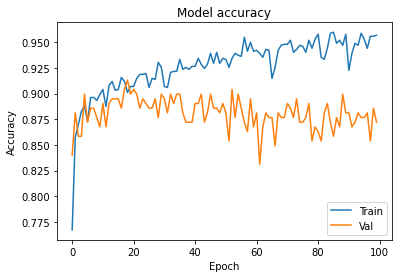

In [24]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
from keras.layers import Dropout
from keras import regularizers

In [26]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [27]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 47ms/step - loss: 14.2600 - accuracy: 0.6477 - val_loss: 3.9037 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 1.6744 - accuracy: 0.8317 - val_loss: 0.7508 - val_accuracy: 0.7717
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.5726 - accuracy: 0.8562 - val_loss: 0.5076 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4976 - accuracy: 0.8738 - val_loss: 0.4777 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 2s 57ms/step - loss: 0.5172 - accuracy: 0.8581 - val_loss: 0.4907 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5131 - accuracy: 0.8552 - val_loss: 0.5255 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 2s 61ms/step - loss: 0.4903 - accuracy: 0.8777 - val_loss: 0.4556 - val_accuracy: 0.8904
Epoch

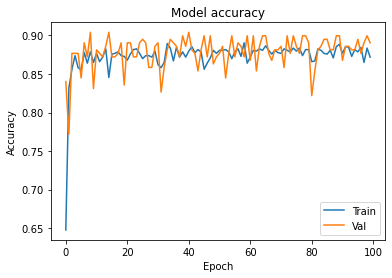

In [29]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()